# Unsupervised Learning - Introduction to Dimensionality Reduction

This practical work aims to discover some applications of dimensionality reduction techniques on various datasets of different complexities. 

Some parts are marked as "bonus", so you can postpone them to the end of the session, or for your personnal work at home. 

Take time to understand what you are implementing of visualizing.


In this practical work, we will use dimensionality reduction techniques to i) visualize data, ii) compress the data while keeping a maximum of relevant information.

We will first start with a classic dataset : The Iris dataset. Load the dataset, and check its dimensions. How can you display this data in 2D ? 

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
n,p = ...
print(f"The dataset as {n} observations, each observation being represented by {p} values")

TypeError: cannot unpack non-iterable ellipsis object

In [5]:
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)
n,p = X.shape
print(f"The dataset as {n} observations, each observation being represented by {p} values")
# => donc impossible a representer en 2D (ou alors une projection arbitraire)

The dataset as 150 observations, each observation being represented by 4 values


Use the `PCA` from the module `sklearn.decomposition` to perform a 2D projection of the data while maximizing the information. Always a good advice the check the documentation !

Plot the new 2D coordinates of the data. 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(...)
X_pca = ...
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)

PCA has reduced the dataset to 2 dimensions


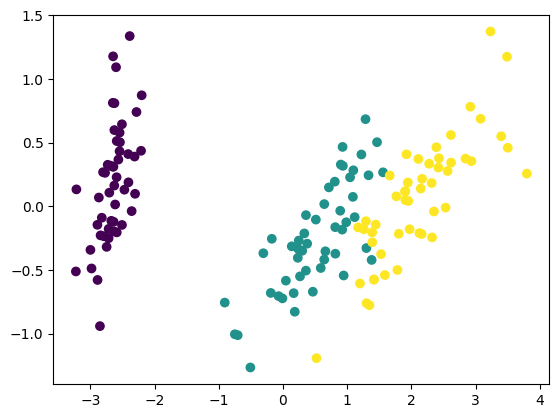

In [6]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
print(f"PCA has reduced the dataset to {n_components} dimensions")
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)
# y a été seulement utilisé pour l'affichage (non supervisé)
# ca aurait été mieux si on avait normalisé (mais j'en parle pas :( )

How much percentage of information (aka variance) is kept by this projection ? 

In [ ]:
percentage_explained_variance = ...
print(f"The two first components explain {percentage_explained_variance:.2f}% of the information")


In [9]:
# Ici le pourcentage est un peu optimiste car on a pas normalisé les données. 
# Comme on parle de variance, si un axe a une grosse variance alors il code artificiellement beaucoup d'infos de dispersion.
# Mais bon, avec des data normalisées, on est autour de 95% au lieu de 98%, ça ne change pas le discours pour ce dataset là


# pourcentage d'information expliquée par les deux premieres composantes
print(f"The two first components explain {pca.explained_variance_ratio_.sum()*100:.2f}% of the information")
# autrement dit : variance de la projection / variance du dataset original 
pourcentage_info_expliquée = np.var(X_pca, axis=0).sum()/np.var(X, axis=0).sum()*100
pourcentage_info_expliquée


The two first components explain 97.77% of the information


97.76852063187948

Perform a 2D projection using the $t$-SNE method, implemented in the module `sklearn.manifold` by the class `TSNE`. Discuss the results.

In [ ]:
from sklearn.manifold import TSNE
X_tsne = ...
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=y)

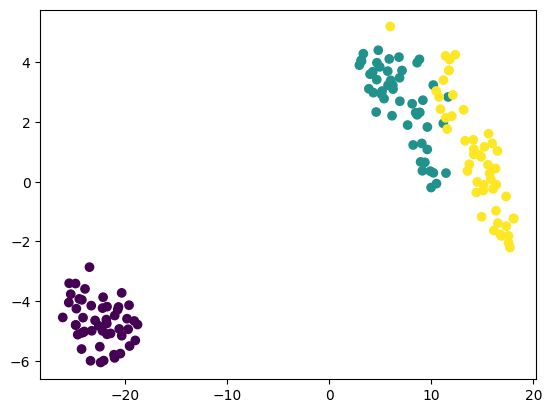

In [11]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30).fit_transform(X)
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=y)
# pas de grande différence, essayons sur un dataset + compliqué
# la perplexité se fait au "feeling" mais plus elle est basse, plus la projection est simpliste, plus elle est haute, plus elle est chaotique



The main limit of PCA is that this method is limited to linear transformations. Then, we will compare the PCA and $t$-SNE on a non linear dataset. 

Create two "moons" using the `make_moons` function without noise. 

In [ ]:
from sklearn.datasets import make_moons

X, y = ...
plt.scatter(X[:,0], X[:,1],c=y)

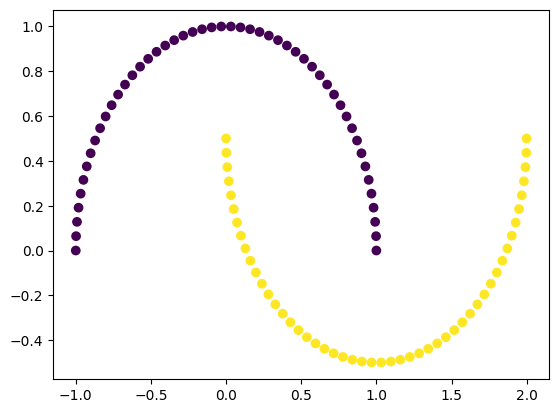

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0., random_state=42)
plt.scatter(X[:,0], X[:,1],c=y)

Perform a 1D projection of this 2D dataset using PCA and $t$-SNE (use a perplexity of 10). Can you spot the difference using a non linear method ? 

In [ ]:

X_pca = ...

X_tsne = ...

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].scatter(X_pca, np.zeros_like(X_pca), c=y, alpha=0.5)
axes[1].scatter(X_tsne, np.zeros_like(X_tsne),c=y, alpha=0.5)
axes[0].set_title("PCA")
axes[1].set_title(r"$t$-SNE")

Text(0.5, 1.0, '$t$-SNE')

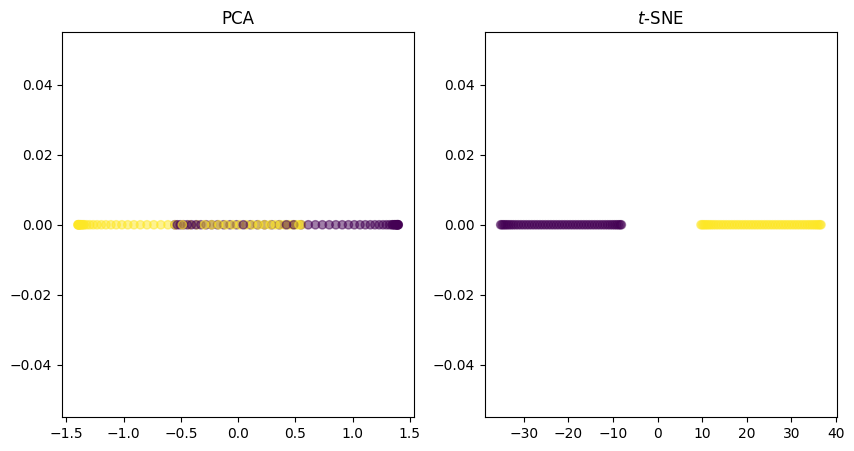

In [13]:
# test de la PCA et TSNE
fig, axes = plt.subplots(1,2, figsize=(10, 5))
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
axes[0].scatter(X_pca, np.zeros_like(X_pca), c=y, alpha=0.5)

X_tsne = TSNE(n_components=1, perplexity=10).fit_transform(X)
axes[1].scatter(X_tsne, np.zeros_like(X_tsne),c=y, alpha=0.5)
# on voit que la PCA ne marche pas, mais la TSNE si
axes[0].set_title("PCA")
axes[1].set_title(r"$t$-SNE")

Let's now try a much more complex dataset. The Olivetti dataset is composed of 400 images of different persons faces, each image being encoded by a 64 x 64 image. We will perform a 2D projection of this data, and plot the coordinates together with the faces to see if the method is able to identify a good latent space. 

First, let's load the dataset and check the dimensions.

In [14]:
from sklearn.datasets import fetch_olivetti_faces
X,y = fetch_olivetti_faces(return_X_y=True)
n,p = X.shape
print(f"The dataset as {n} observations, each observation being represented by {p} values")

The dataset as 400 observations, each observation being represented by 4096 values


The following function  `plot_faces` will help you to plot the images with the coordinates you computed using your 2D projection. 


In [15]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_faces(faces, coords):

    # Setup figure and axis, adjust figsize for a larger plot
    fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize as needed

    for face, coord in zip(faces, coords):
        img = face.reshape(64, 64)
        imagebox = OffsetImage(img, zoom=.25, cmap="gray")  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, coord, frameon=False)
        ax.add_artist(ab)

    # Adjust limits if needed, based on the range of PCA components
    ax.set_xlim(coords[:, 0].min() - 5, coords[:, 0].max() + 5)
    ax.set_ylim(coords[:, 1].min() - 5, coords[:, 1].max() + 5)
    plt.show()

Compute the PCA on Olivetti dataset, and display the images with the coordinates computed with PCA.

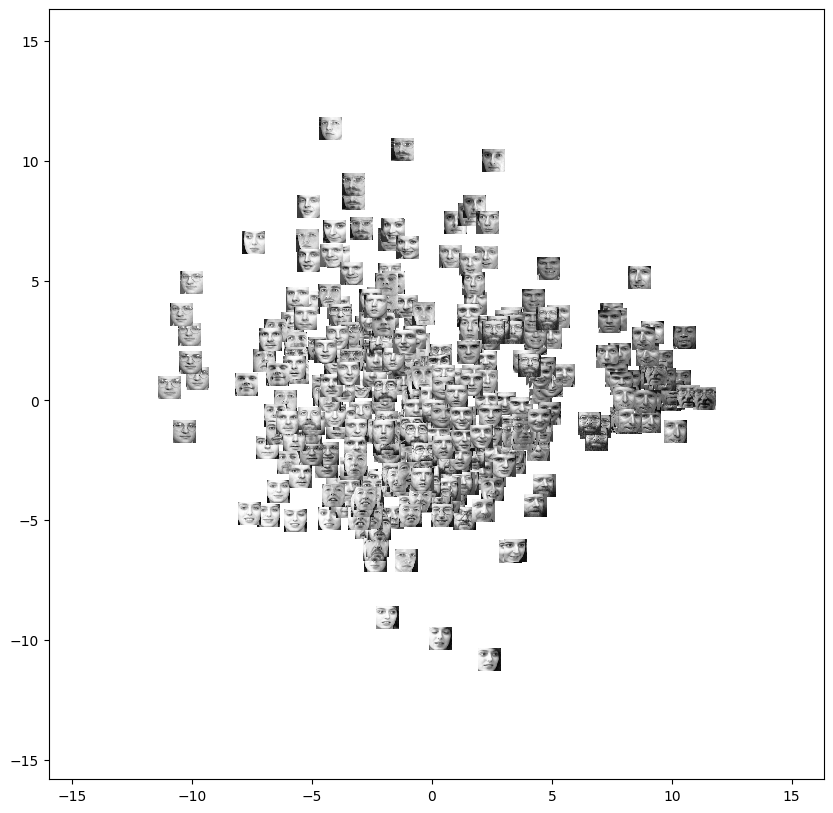

In [16]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_faces(X,X_pca)


Do the same with $t$-SNE. Tune the perplexity parameter.  What do you think about the two 2D projections ?

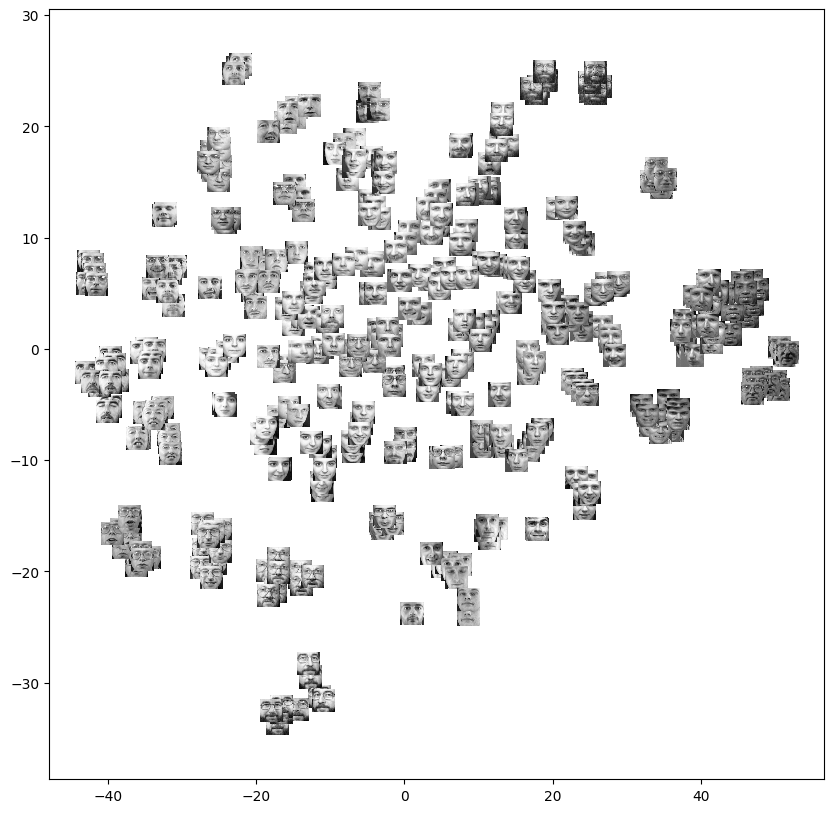

In [17]:
from sklearn.manifold import TSNE   
X_tsne = TSNE(n_components=2, perplexity=20).fit_transform(X)
plot_faces(X,X_tsne)
# on voit que  TSNE est plus adapté !

**Bonus Application : Image compression**

The PCA can be used to compress image information. The purpose is to find a good trade off between quantity of data and quantity of information. We will test the PCA on this task.

First, we will load a gray level image.

(-0.5, 511.5, 276.5, -0.5)

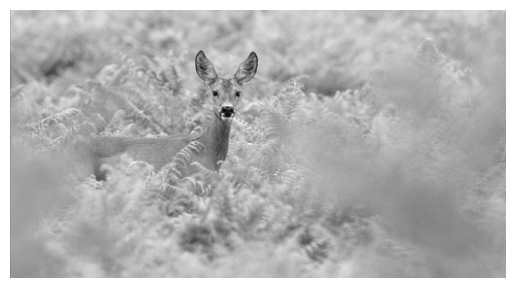

In [18]:
import numpy as np
from matplotlib.image import imread
image = imread("chevreuil.png")
coeff_conversion_gray = [0.2989, 0.5870, 0.1140]
image = np.dot(image,coeff_conversion_gray) # we convert the color image to gray level according to human perception
plt.imshow(image,cmap="gray")
plt.axis('off')

Considering the image as a series of observations, perform a full PCA (with maximum number of components) and check how many information is kept by $d$ first dimensions (make a plot). 

Determine graphically and numerically how many components do you need to keep 90% of information ? and 75% ?

In [19]:
pca = PCA()
pca.fit(...)
explained_variance = ...
plt.plot(...)

info_threshold = 0.9

nb_min_components = ... 
print(f"We need {nb_min_components} to encode {info_threshold*100:.2f}% of the information")


TypeError: float() argument must be a string or a real number, not 'ellipsis'

9


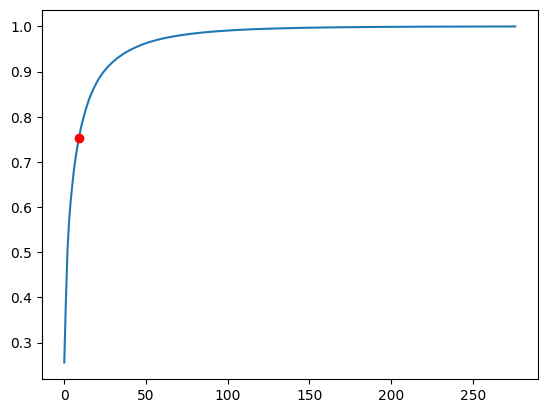

In [20]:
pca = PCA()
pca.fit(image)
variance_expliquee = np.cumsum(pca.explained_variance_ratio_)
plt.plot(variance_expliquee)
seuil_variance = 0.75
# a partir de combien de composantes on garde 90 % de la variance ? 
# graphiquement ~ 30
# numériquement : 
nb_min_components =np.argmax(variance_expliquee > seuil_variance) 
print(f"{nb_min_components}") # indicde la premiere occurence est retournée (cf doc)
plt.plot(nb_min_components, variance_expliquee[nb_min_components], "ro")

Perform a PCA using the minimal number of components you just compute. Compute the projection of your image. How many data do you have now ? (don't forget the data required to reconstruct the image !)

Compare with the amount of data of uncompressed image.

In [21]:

pca = PCA(n_components=...)
pca.fit(...)
reduced_image = ...
nb_pixels_original = ...
print(f"Quantité d'infos avant compression : {nb_pixels_original}")

nb_info_compresse =  ...
print(f"Quantité d'infos après compression : {nb_info_compresse}") 
print(f"Soit un ratio de compression de x {...}")


InvalidParameterError: The 'n_components' parameter of PCA must be an int in the range [0, inf), a float in the range (0.0, 1.0), a str among {'mle'} or None. Got Ellipsis instead.

In [22]:
# on calcule la projection
pca = PCA(n_components=nb_min_components)
pca.fit(image)
# voici la version compressée, impossible à visualiser car elle n'est plus dans l'espace des images
reduced_image = pca.transform(image)
# la quantité d'info à été ramenée à  277 * 25 (l'image compressée) + 25 * 277 (la matrice de changement de base) pour 90 % de l'info encodée
nb_pixels = image.shape[0]*image.shape[1]
print(f"Quantité d'infos avant compression : {nb_pixels}")
nb_info_compresse =  reduced_image.shape[0]*reduced_image.shape[1] + pca.components_.shape[0]*pca.components_.shape[1]
print(f"Quantité d'infos après compression : {nb_info_compresse}") 
print(f"Soit un ratio de compression de x {nb_pixels/nb_info_compresse:.2f} pour {seuil_variance*100:.2f}% de l'information")


Quantité d'infos avant compression : 141824
Quantité d'infos après compression : 7101
Soit un ratio de compression de x 19.97 pour 75.00% de l'information


Now, we will reconstruct our image after the compression. To do so, we can rely on the `inverse_transform` function of the `PCA` class. Check the original image and the reconstructed one side by side. Try different levels of compression. 

TypeError: Image data of dtype object cannot be converted to float

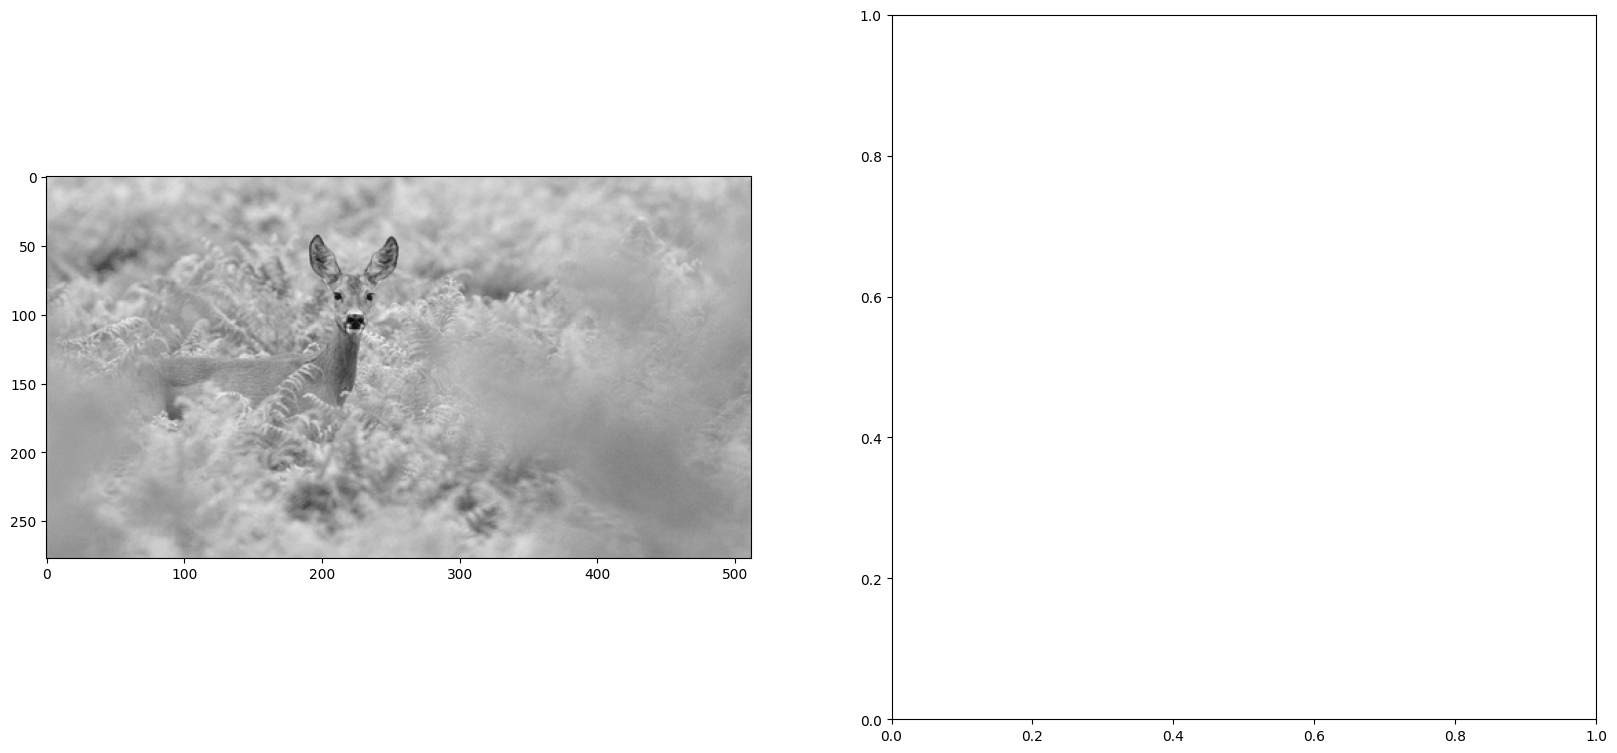

In [23]:
reconstructed_image = ... 

fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(image,cmap="gray")
ax[1].imshow(reconstructed_image,cmap="gray")
ax[0].axis('off')
ax[1].axis('off')


(-0.5, 511.5, 276.5, -0.5)

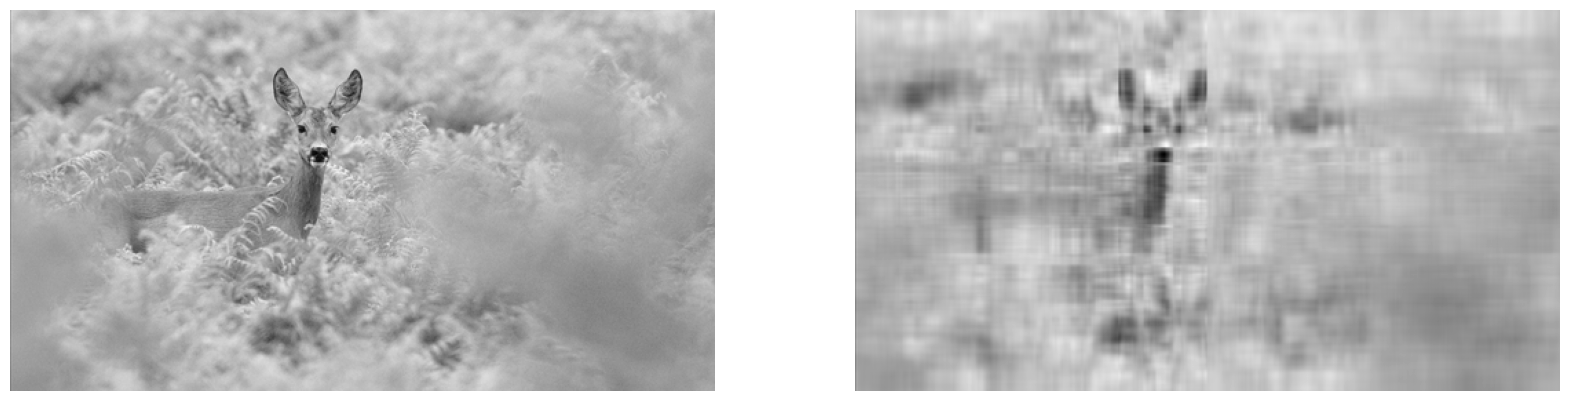

In [24]:
# on reconstruit
image_reconstruite = pca.inverse_transform(reduced_image)
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(image,cmap="gray")
ax[1].imshow(image_reconstruite,cmap="gray")
ax[0].axis('off')
ax[1].axis('off')
# il ne faut pas confondre info et qualité ! 